In [121]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

import pytesseract

In [184]:
from find_table_in_image import find_dots
from enhance_table_lines import get_lines
from skewness import skewCorrect

In [254]:
class Student:
    
    def __init__(self, name):
        self.name = name 
        
    def print_name(self):
        print(self.name)

In [255]:
kukil = Student("kukil")

In [ ]:
game = Game("size")

In [ ]:
game2 = Game()

In [174]:
class Document:
    
    def __init__(self, doc_path):
        doc = cv2.imreadmulti(doc_path)
        
        self.num_pages = len(doc[1])
        
        self.first_page = doc[1][0]

        if self.num_pages>1:
            self.second_page = doc[1][1]
        else:
            self.second_page = None
           
                
    def show(self):
        
        if self.num_pages == 1: 
            plt.figure(figsize = (12,8))
            plt.imshow(self.first_page, cmap="gray")
            
        elif self.num_pages > 1: 
            plt.figure(figsize = (24,8))
            plt.subplot(121)
            plt.imshow(self.first_page, cmap="gray")
            plt.title("First Page")
            
            plt.subplot(122)
            plt.imshow(self.second_page, cmap="gray")
            plt.title("Second Page")
            
            
    def crop_image(self, img, position):
        height, width = img.shape[:2]
        center = (height//2, width//2)
        if position == "tl":
            return img[0:center[0],0:center[1]]
        elif position == "tr":
            return img[0:center[0],center[1]:width]
        elif position == "bl":
            return img[center[0]:height,0:center[1]]
        elif position == "br":
            return img[center[0]:height, center[1]:width]
        else: 
            raise ValueError("Please Make sure the position is one of tl, tr, bl, br")

    def get_subsection(self, pos, page = "first"):
        if page == "first":
            result = self.crop_image(self.first_page, pos)
            subsection = Subsection(result)
            return subsection
            

In [187]:
class Subsection:
    
    def __init__(self, image):
        self.image = image 
        
    def preprocess(self):
        _, self.image = cv2.threshold(self.image, 0, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
        self.image = self.detect_and_remove_blur()    
        self.image = self.detect_and_enhance_table()
        
    def get(self):
        return self.image
        
    def show(self):
        plt.imshow(self.image, cmap="gray")
        
    def get_text(self):
        return pytesseract.image_to_string(self.image)
    
    def detect_and_remove_blur(self):
        img = np.copy(self.image)
        score = cv2.Laplacian(img, cv2.CV_64F).var()
        
        if score < 500:
            sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            img = cv2.filter2D(img, -1, sharpen_kernel)
            
        score = cv2.Laplacian(img, cv2.CV_64F).var()
            
        if score < 500:
            raise ValueError("This Image is too blurry")
            
        return img
    
    def detect_and_enhance_table(self):
        result = np.copy(self.image)
        num_dots = find_dots(self.image)
        
        if num_dots>10:
            result = get_lines(result)
        
        return result
    
    def correct_skew(self):
        return skewCorrect(self.image)
    
    def remove_salt_pepper_noise(self): 
        im = np.copy(self.image)

        self.image = cv2.medianBlur(im, 3)
        
        print("Image de noised.")

In [176]:
def deblur_sharpen(image):
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(image, -1, sharpen_kernel)

    return sharpen

def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

# Test 

In [207]:
doc = Document("sample3.tif")

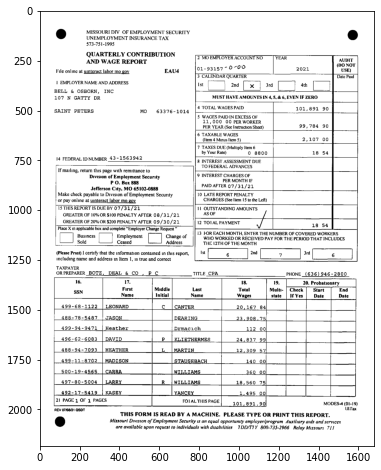

In [208]:
doc.show()

In [209]:
sub = doc.get_subsection("tl")

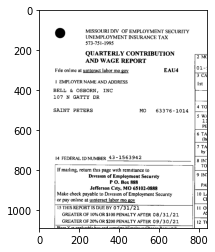

In [210]:
sub.show()

In [211]:
before = sub.get_text()

In [212]:
print(before)

@ MISSOURI DIV OF EMPLOYMENT SECURITY
UNEMPLOYMENT INSURANCE TAX
573-751-1995

QUARTERLY CONTRIBUTION
AND WAGE REPORT

File online at winteract labor mo gov EAU4

1 EMPLOYER NAME AND ADDRESS

BELL & OSBORN, INC
107 N GATTY DR

SAINT PETERS MO 63376-1014

14 FEDERAL ID NUMBER 43~-1563942

 

 

 

If matling, return this page with remittance to
Division of Employment Security
P O. Box 888
Jefferson City, MO 65102-0888
Make check payable to Division of Employment Security

or pay online at uinteract labor mo gov

 

15 THIS REPORT IS DUE BY 07/31/21
GREATER OF 10% OR $100 PENALTY AFTER 08/31/21
GREATER OF 20% OR $200 PENALTY AFTER 09/30/21

 

    

 

 

 



In [213]:
len(before)

665

In [214]:
sub.preprocess()

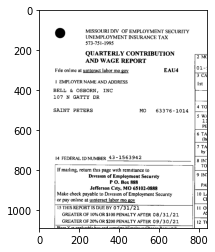

In [215]:
sub.show()

In [217]:
after = sub.get_text()
print(after)

@ MISSOURI DIV OF EMPLOYMENT SECURITY
UNEMPLOYMENT INSURANCE TAX
573-751-1995

QUARTERLY CONTRIBUTION
AND WAGE REPORT

File online at winteract labor mo gov EAU4

1 EMPLOYER NAME AND ADDRESS

BELL & OSBORN, INC
107 N GATTY DR

SAINT PETERS MO 63376-1014

14 FEDERAL ID NUMBER 43~-1563942

 

 

 

If matling, return this page with remittance to
Division of Employment Security
P O. Box 888
Jefferson City, MO 65102-0888
Make check payable to Division of Employment Security

or pay online at uinteract labor mo gov

 

15 THIS REPORT IS DUE BY 07/31/21
GREATER OF 10% OR $100 PENALTY AFTER 08/31/21
GREATER OF 20% OR $200 PENALTY AFTER 09/30/21

 

    

 

 

 



In [218]:
len(after)

665

# Highly Blurred Image 

In [219]:
sub = Subsection(cv2.imread("rossum-invoice-elis-blur.png",0))

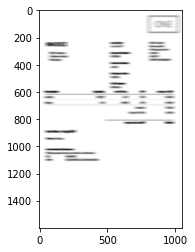

In [220]:
sub.show()

In [221]:
sub.preprocess()

ValueError: This Image is too blurry

# Test - Rotated

In [224]:
sub = Subsection(cv2.imread("472deb7a-6ef8-4197-afe2-d26866b79a6f.jpg",0))

TypeError: Image data of dtype object cannot be converted to float

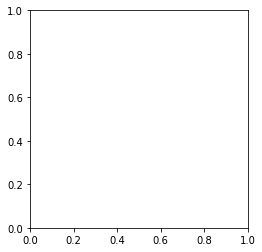

In [225]:
sub.show()

# TEST: ROTATED

In [249]:
img = cv2.imread("sample_rotated.png",0)

In [250]:
sub = Subsection(img)

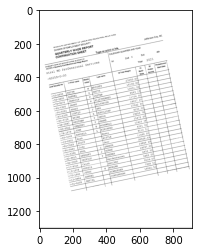

In [251]:
sub.show()

In [252]:
sub.preprocess()

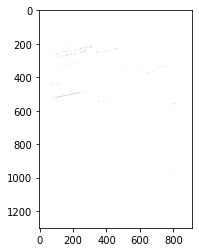

In [253]:
sub.show()